# 1. Alexnet
AlexNet은 2012년 ILSVRC(ImageNet Large Scale Visual Recognition Challenge)에서 우승한 딥러닝 모델로, 딥러닝의 대중화를 이끈 중요한 합성곱 신경망(CNN)입니다.
- 이 모델은 8개의 레이어(5개의 합성곱 레이어와 3개의 완전 연결 레이어)로 구성되어 있으며,
- ReLU 활성화 함수, 드롭아웃(dropout), 데이터 증강(data augmentation) 등을 사용해 과적합을 방지하고 학습 성능을 향상시켰습니다.
- AlexNet은 대규모 데이터셋과 GPU 병렬 연산을 활용해 1,000개의 클래스 분류 문제에서 top-1, top-5 error rates가 각각 37.5%, 17.5%로 뛰어난 성능을 보여, 컴퓨터 비전에서 딥러닝이 표준 기법으로 자리 잡는 데 기여했습니다.
- 이 성과는 당시 기준으로 매우 뛰어난 결과였습니다. 특히 AlexNet은 이전에 사용된 전통적인 머신러닝 방법론보다 훨씬 큰 차이로 성능을 끌어올리며, 딥러닝의 가능성을 보여주었습니다.  

[관련 논문 링크]('https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf')

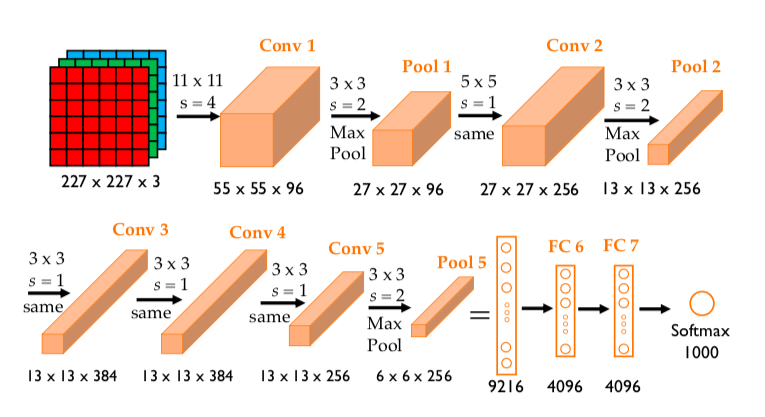

### ※ ImageNet LSVRC

ImageNet LSVRC는 Large Scale Visual Recognition Challenge의 약자로, 이미지 인식 및 분류 기술을 겨루는 대회입니다. 2010년부터 매년 개최되었으며,  
 ImageNet이라는 대규모 이미지 데이터셋을 기반으로 참가자들이 다양한 모델을 설계하고 경쟁했습니다.

- ImageNet 데이터셋: 약 1400만 장의 이미지를 포함하며, 1000개의 클래스(예: 고양이, 강아지, 자동차 등)로 분류된 대규모 이미지 데이터셋입니다.
- 목적: 컴퓨터 비전 및 딥러닝 기술의 발전을 촉진하고, 이미지 인식 분야에서 혁신적인 기술을 발견하는 것이 목표였습니다.
- LSVRC-2010: 이 대회에서 AlexNet이 2012년에 처음으로 딥러닝 기반 접근법을 사용해 뛰어난 성능을 보여줌으로써 딥러닝의 새로운 시대를 열었습니다.


### ※ Error Rate

이미지 분류 모델의 성능을 평가하는 지표로, 모델이 이미지를 얼마나 정확히 분류했는지를 나타냅니다.



1. Top-1 Error Rate

- 모델이 예측한 가장 높은 확률의 클래스(Top-1)가 정답이 아닐 확률입니다.
- 예를 들어, 이미지에 "고양이"가 있고, 모델이 가장 높은 확률로 "강아지"라고 예측했다면, 이건 Top-1 에러입니다.​
2. Top-5 Error Rate

- 모델이 예측한 상위 5개의 클래스 중 하나라도 정답에 포함되지 않았을 확률입니다.
- 예를 들어, 이미지가 "고양이"인데 모델이 "강아지", "토끼", "고양이", "호랑이", "여우"를 상위 5개로 예측했다면, 이건 정답으로 간주됩니다.
- Top-5를 사용하는 이유: 사람이 보기에 유사한 클래스(예: 치타와 표범)를 분류하는 것은 어렵기 때문에, 상위 5개 중에 정답이 있는지를 확인하는 방식으로 보다 실용적인 성능을 평가합니다.

# 2. glasses vs noglasses 분류하기

In [1]:
%cd /content/drive/MyDrive/AI활용 소프트웨어 개발/10. 파이썬 웹 서비스/12.딥러닝/data #경로이동

[Errno 2] No such file or directory: '/content/drive/MyDrive/AI활용 소프트웨어 개발/10. 파이썬 웹 서비스/12.딥러닝/data #경로이동'
/content


In [2]:
!unzip -qq glass.zip #압축풀기

unzip:  cannot find or open glass.zip, glass.zip.zip or glass.zip.ZIP.


# Import 정리

In [18]:
# import 정리
import os
import torch
import glob
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

from PIL import Image
from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, Dataset



In [4]:
# cpu로 돌리면 시간이 걸릴 수 있어서, gpu로 돌리기
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

이미지에는 글자(레이블)가 있다. 그걸 잘라내고 이미지 학습을 진행시켜보도록 하자.   
- crop 하는 함수를 만들어보자

In [5]:
def display_images_center_crop(image_paths, title, max_images=4):
    plt.figure(figsize=(12,3))
    for i, image_path in enumerate(image_paths[:max_images]): # i에는 0,1,2,3 이런게 돌거고, max_images(4개)까지만 보여질 것
        image = Image.open(image_path)
        width, height = image.size # 이미지 속성에서 받아옴

        # 이미지 중앙의 정사각형 영역 계산
        new_edge_length = min(width, height) # 너비 높이 중에 더 작은 것
        left = (width - new_edge_length) / 2 # 중앙값 구하는 것
        top = (height - new_edge_length) / 2
        right = (width + new_edge_length) / 2
        bottom = (height + new_edge_length) / 2

        # 중앙 영역 크롭
        image_cropped = image.crop((10,20,width-10,height-15))

        # 크롭된 이미지 시각화
        plt.subplot(1, max_images, i+1)
        plt.imshow(image_cropped)
        plt.axis('off')
        plt.title(title)
    plt.show()


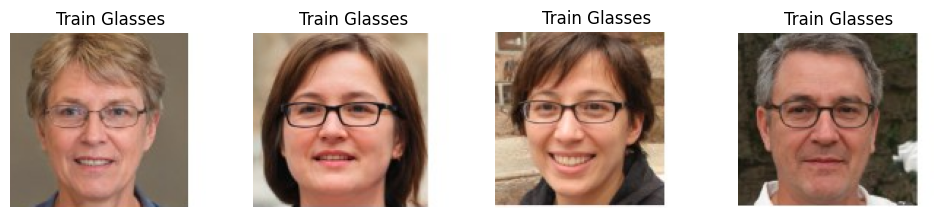

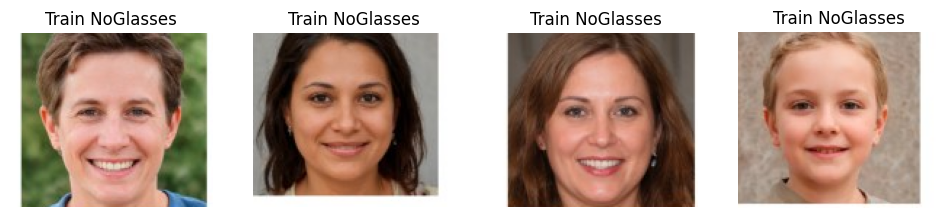

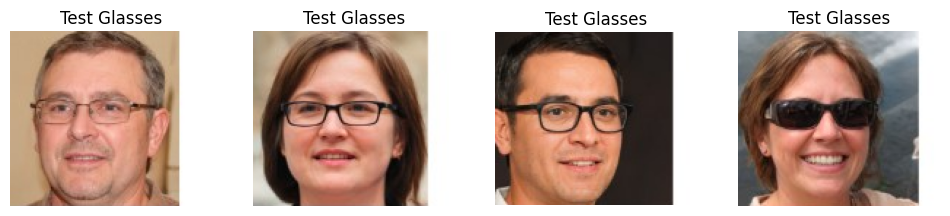

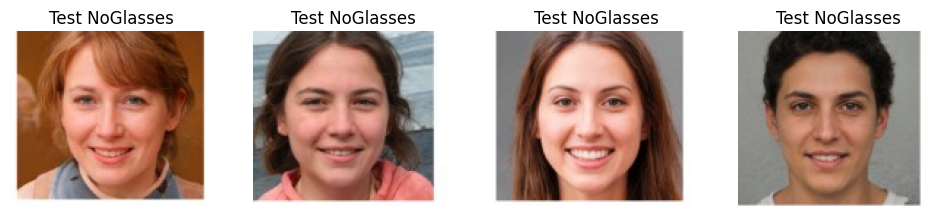

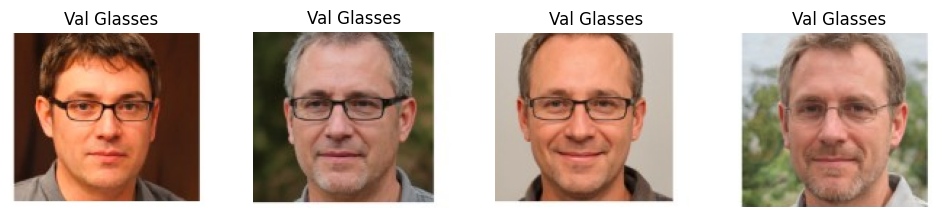

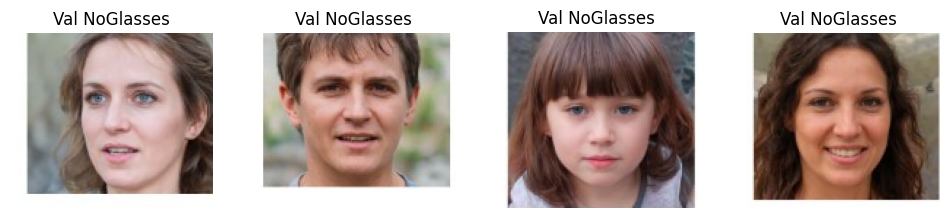

In [6]:
# Train 안에 Glasses가 있어, Train안에 No Glasses가 있어..
categories = ['Train Glasses', 'Train NoGlasses', 'Test Glasses', 'Test NoGlasses', 'Val Glasses', 'Val NoGlasses']

# glob : 파일 경로를 패턴으로 검색할 수 있게 해주는 함수
for category in categories:
    # 소문자로 바꾸고, 띄어쓰기를 다 슬래시로 바꾸겠다 -> 경로로 바꾸게 될 것, 그 안쪽에 모든 걸 가져와라
    image_paths = glob.glob(f'/content/drive/MyDrive/AI활용 소프트웨어 개발/10. 파이썬 웹 서비스/12.딥러닝/data/glass/{category.lower().replace(" ", "/")}/*')
    # print(image_paths)
    # 한 바퀴 돌 때 하나의 리스트(한 폴더), 이걸 다 집어 넣고, 이름(category)을 넣어줄 것
    display_images_center_crop(image_paths, category)


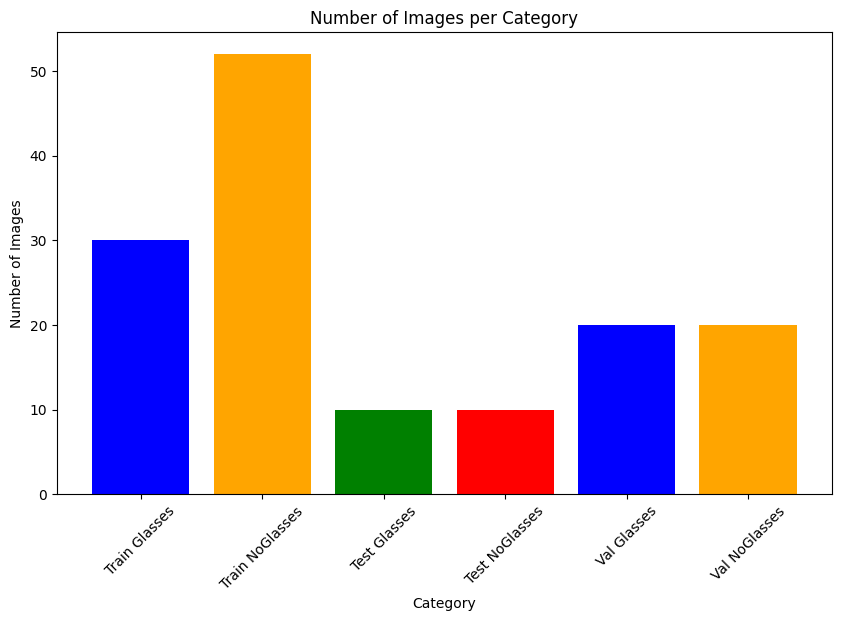

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(categories, [len(glob.glob(f'/content/drive/MyDrive/AI활용 소프트웨어 개발/10. 파이썬 웹 서비스/12.딥러닝/data/glass/{category.lower().replace(" ", "/")}/*')) for category in categories], color=['blue', 'orange', 'green', 'red'])
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

In [8]:
transform = transforms.Compose([
    transforms.CenterCrop(128), # 이미지 중앙을 기준으로 128 * 128 크기로 자르는 것
    transforms.Resize((227,227)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    # 밝기, 대비, 채도, 색조
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [9]:
train_dataset = ImageFolder('/content/drive/MyDrive/AI활용 소프트웨어 개발/10. 파이썬 웹 서비스/12.딥러닝/data/glass/train',transform=transform)
val_dataset = ImageFolder('/content/drive/MyDrive/AI활용 소프트웨어 개발/10. 파이썬 웹 서비스/12.딥러닝/data/glass/val',transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4,shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4,shuffle=False) #학습시키면서 검증하는 거라 셔플 False

In [10]:
class AlexNet(nn.Module):
    def __init__(self,num_classes=1000):
        super(AlexNet,self).__init__()

        # Convolutional Layer
        self.conv1 = nn.Conv2d(3, 96, kernel_size=11,stride=4 )
        self.conv2 = nn.Conv2d(96, 256, kernel_size=5, padding='same')
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, padding='same')
        self.conv4 = nn.Conv2d(384, 384, kernel_size=3, padding='same')
        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, padding='same')

        # Max Pooling Layer
        self. maxpool = nn.MaxPool2d(kernel_size=3, stride=2)

        # Fully Connected Layer
        self.fc1 = nn.Linear(256*6*6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)

    def forward(self, x):
        x = self.maxpool(F.relu(self.conv1(x)))
        x = self.maxpool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.maxpool(F.relu(self.conv5(x)))

        x = x.view(x.size(0), 256 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [11]:
model = AlexNet(num_classes=2) # 클래스 2개 뽑을게요
model = model.to(device)

In [12]:
# loss 함수 객체 만들기
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)

In [13]:
# 정확도 계산 함수
def calculate_accuracy(loader,model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            images, labels = inputs.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0) # 정답을 total에다 넣어준다,
            # total은 왜 넣었을까? label의 갯수 세기 위해
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

In [14]:
train_losses = [] #train의 acc는 담을 필요 없음. 어차피 좋아질 것이기 때문
val_losses = []
val_accuracies = []

num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # 기울기 구하고
        running_loss += loss.item() # loss 누적시키고
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # 평가모드
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    val_accuracy = calculate_accuracy(val_loader, model)
    val_accuracies.append(val_accuracy) #각각의 값을 추가할 것

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')


print('학습 및 검증 완료')

Epoch [1/30], Train Loss: 0.7376, Val Loss: 0.6948, Val Accuracy: 50.00%
Epoch [2/30], Train Loss: 0.6780, Val Loss: 0.6992, Val Accuracy: 50.00%
Epoch [3/30], Train Loss: 0.6623, Val Loss: 0.7093, Val Accuracy: 50.00%
Epoch [4/30], Train Loss: 0.6086, Val Loss: 0.8337, Val Accuracy: 50.00%
Epoch [5/30], Train Loss: 0.5549, Val Loss: 0.6744, Val Accuracy: 57.50%
Epoch [6/30], Train Loss: 0.5476, Val Loss: 0.6916, Val Accuracy: 50.00%
Epoch [7/30], Train Loss: 0.7137, Val Loss: 0.8756, Val Accuracy: 50.00%
Epoch [8/30], Train Loss: 0.6579, Val Loss: 0.6922, Val Accuracy: 50.00%
Epoch [9/30], Train Loss: 0.6630, Val Loss: 0.6955, Val Accuracy: 50.00%
Epoch [10/30], Train Loss: 0.5827, Val Loss: 0.6662, Val Accuracy: 60.00%
Epoch [11/30], Train Loss: 0.4734, Val Loss: 1.5284, Val Accuracy: 50.00%
Epoch [12/30], Train Loss: 0.5078, Val Loss: 1.4014, Val Accuracy: 47.50%
Epoch [13/30], Train Loss: 0.4582, Val Loss: 0.9440, Val Accuracy: 57.50%
Epoch [14/30], Train Loss: 0.4212, Val Loss: 2.

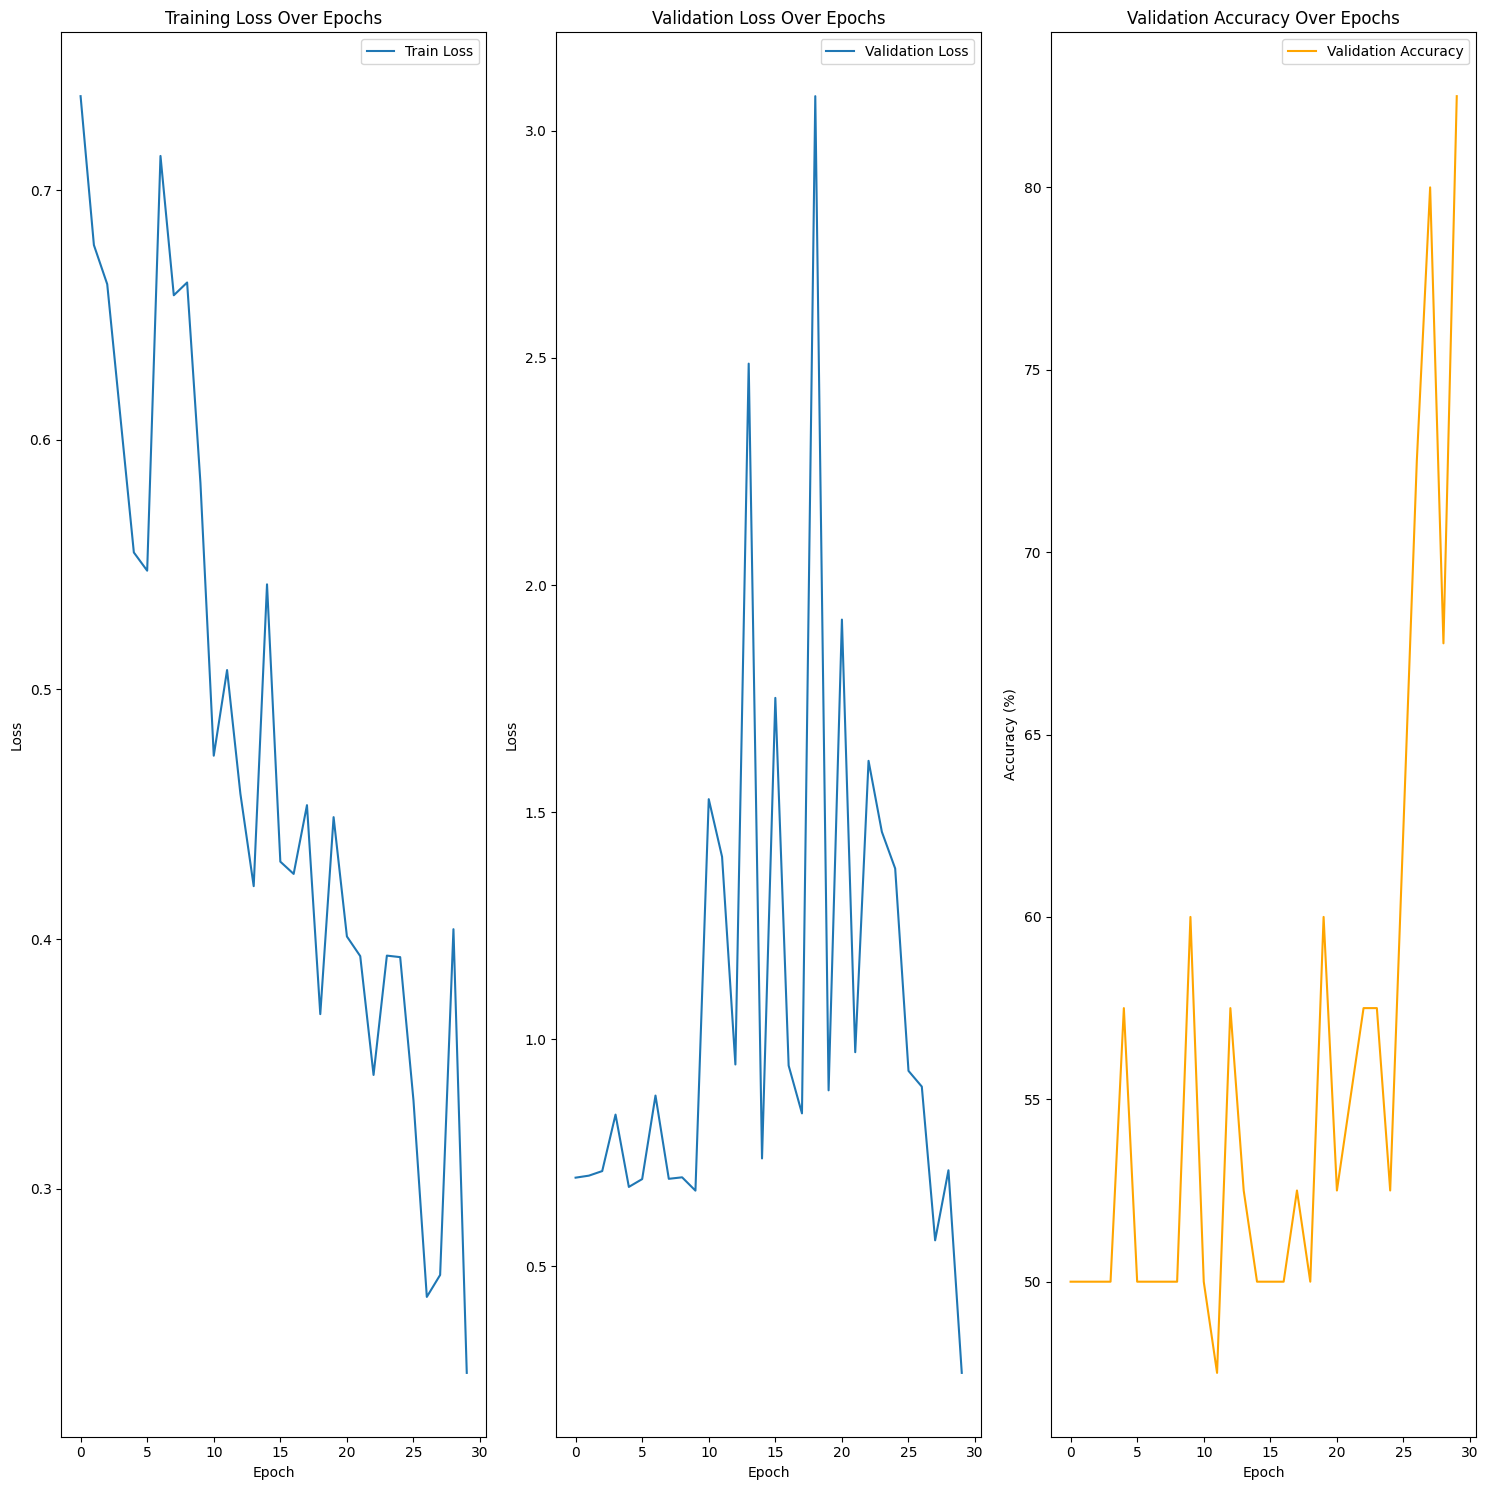

In [16]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.tight_layout()
plt.show()

< 그래프 해석 >  
이미지가 커야하고, 갯수도 많아야할 것 같다. -> 다시 데이터를 수집하거나, 전처리 단계에서 데이터를 수정하거나 하는 해결법

In [29]:
def load_and_transform_image(image_path, transform):
    image = Image.open(image_path).convert('RGB')
    width, height = image.size

    left = (width - 128) / 2
    top = (height - 128) / 2
    right = (width + 128) / 2
    bottom = (height + 128) / 2

    # image_cropped = image.crop((left, top, right, bottom))
    # image_transformed = transform(image_cropped).unsqueeze(0) # 차원 추가될 것
    # return image_transformed

    image_cropped = image.crop((left, top, right, bottom))
    return transform(image_cropped), image_cropped



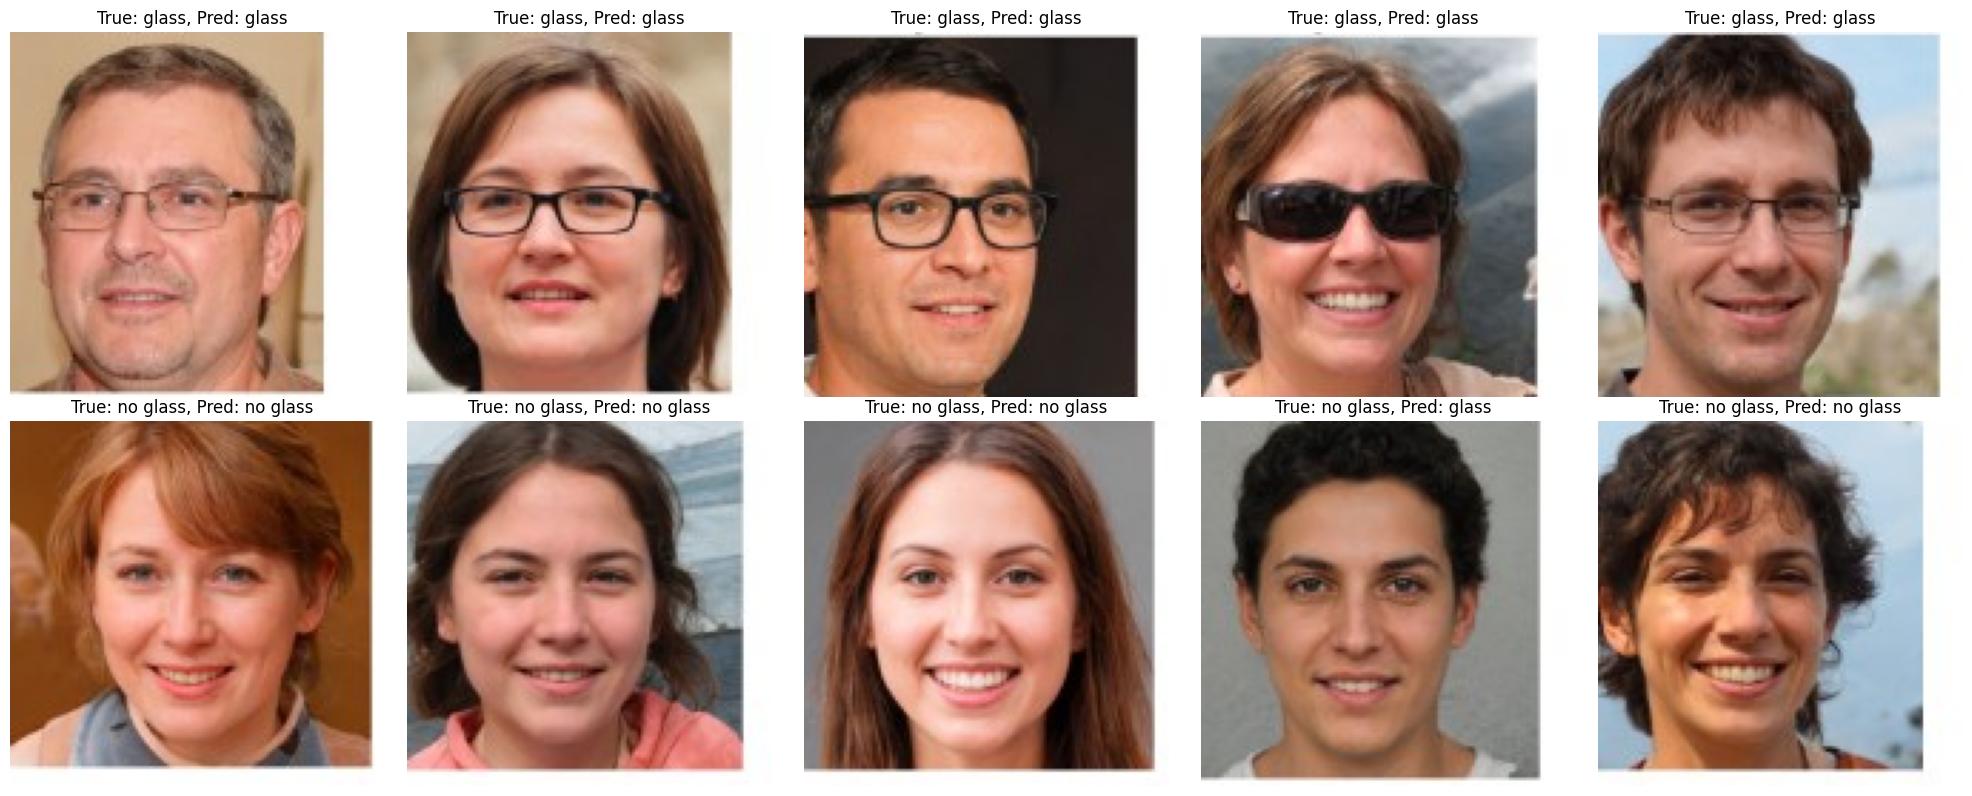

In [33]:
class_folders = {
    'glass':'/content/drive/MyDrive/AI활용 소프트웨어 개발/10. 파이썬 웹 서비스/12.딥러닝/data/glass/test/glasses',
    'no glass' : '/content/drive/MyDrive/AI활용 소프트웨어 개발/10. 파이썬 웹 서비스/12.딥러닝/data/glass/test/noglasses'
}

plt.figure(figsize=(20, 8))

counter = 1

for class_name, folder_path in class_folders.items():
    image_paths = glob.glob(os.path.join(folder_path, "*"))
    selected_paths = image_paths[:5]
    for image_path in selected_paths:
        image, image_cropped = load_and_transform_image(image_path, transform)
        image_unsqueeze = image.unsqueeze(0).to(device)
        # image_unsqueeze = image_unsqueeze.to(device)
        output = model(image_unsqueeze)
        _, predicted = torch.max(output, 1)
        prediction = 'glass' if predicted.item() == 0 else 'no glass'

        plt.subplot(2, 5, counter)
        plt.imshow(image_cropped)
        plt.title(f'True: {class_name}, Pred: {prediction}')
        plt.axis('off')
        counter += 1

plt.tight_layout()
plt.show()